Identifying trends in production or injection rates can be crucial for understanding the general behavior of wells and planning future operations accordingly.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('C:\\Users\\ihsankoo\\Downloads\\Liang_Cleaned.csv')

In [12]:
df.head()

,Date,Well Name,Surface X,Surface Y,Is Injector Well,Oil Production Rate,Water Production Rate,Gas Production Rate,Water Injection Rate,Gas Injection Rate,Bottomhole Pressure,Active Days
0,1/1/2000,P-1,15,5,0,709.09,3.03,0,0.0,0,100,30.5
1,2/1/2000,P-1,15,5,0,1024.24,69.70,0,0.0,0,100,30.5
2,3/1/2000,P-1,15,5,0,957.58,2221.21,0,0.0,0,100,30.5
3,4/1/2000,P-1,15,5,0,481.82,3478.79,0,0.0,0,100,30.5
4,5/1/2000,P-1,15,5,0,448.48,666.67,0,0.0,0,100,30.5


In [13]:
df['Date'] = pd.to_datetime(df['Date'])

#### Step 1. Identifying Trends in Oil Production Rate
To identify trends, we can employ moving averages, which smooth out short-term fluctuations and highlight longer-term trends. By plotting the actual data alongside the moving average, we can visually identify the underlying trends.

Let's start by visualizing the overall trend in oil production rate using a moving average.

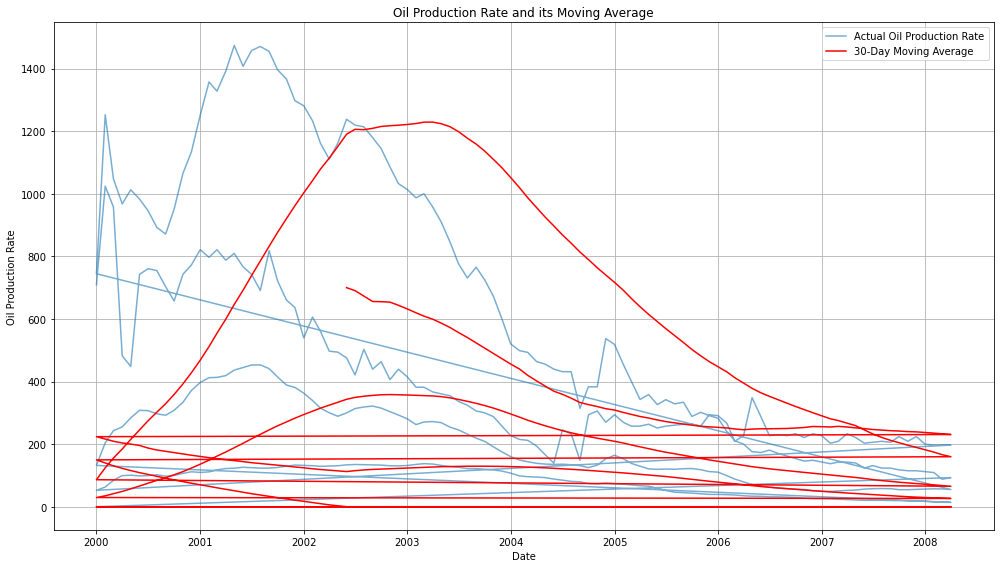

In [14]:
# Calculating the moving average for Oil Production Rate
df['Oil Production MA'] = df['Oil Production Rate'].rolling(window=30).mean()

# Plotting the Oil Production Rate and its moving average
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Oil Production Rate'], label='Actual Oil Production Rate', alpha=0.6)
plt.plot(df['Date'], df['Oil Production MA'], label='30-Day Moving Average', color='red')
plt.title('Oil Production Rate and its Moving Average')
plt.xlabel('Date')
plt.ylabel('Oil Production Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Below is an interactive dropdown for selecting different wells and viewing their "Oil Production Rate" along with its "30-Day Moving Average"

In [15]:
# List of unique wells
wells = df['Well Name'].unique()

# Calculating the moving average for Oil Production Rate
df['Oil Production MA'] = df['Oil Production Rate'].rolling(window=30).mean()

# Create an empty figure for Oil Production Rate
fig_oil = go.Figure()

# Add an interactive dropdown menu for Oil Production Rate
buttons_oil = []
for well in wells:
    well_df = df[df['Well Name'] == well]
    years = well_df['Date'].dt.year.unique()
    visible = [well == w for w in wells]
    
    button = dict(label=well,
                  method='update',
                  args=[{'visible': visible},
                        {'title': f'Oil Production Rate and its Moving Average for {well}',
                         'xaxis': {'tickvals': years, 'ticktext': years}}])
    buttons_oil.append(button)
    
    fig_oil.add_trace(go.Scatter(x=well_df['Date'], y=well_df['Oil Production Rate'], mode='lines', name='Actual Oil Production Rate'))
    fig_oil.add_trace(go.Scatter(x=well_df['Date'], y=well_df['Oil Production MA'], mode='lines', name='30-Day Moving Average', line=dict(color='red')))

# Update the layout for Oil Production Rate
fig_oil.update_layout(title=f'Oil Production Rate and its Moving Average',
                      xaxis_title='Year', 
                      yaxis_title='Oil Production Rate',
                      updatemenus=[dict(buttons=buttons_oil, direction='down', x=1.05, y=1.2, showactive=True)])

# Display the initial well data for Oil Production Rate
fig_oil.update_traces(visible=False)
fig_oil.data[0].visible = True
fig_oil.data[1].visible = True

# Display the plot for Oil Production Rate
fig_oil.show()


The plot above showcases the Oil Production Rate (in blue) and its 30-Day Moving Average (in red):

* The moving average (in red) smoothens out short-term fluctuations and provides a clearer view of the overall trend.
* There's a noticeable declining trend in oil production, particularly in the earlier part of the dataset.
* In the later part, the trend seems to stabilize, with some fluctuations.

<hr>

#### Step 2: Identifying Trends in Water Production Rate
I'll visualize the overall trend in water production rate using a moving average.

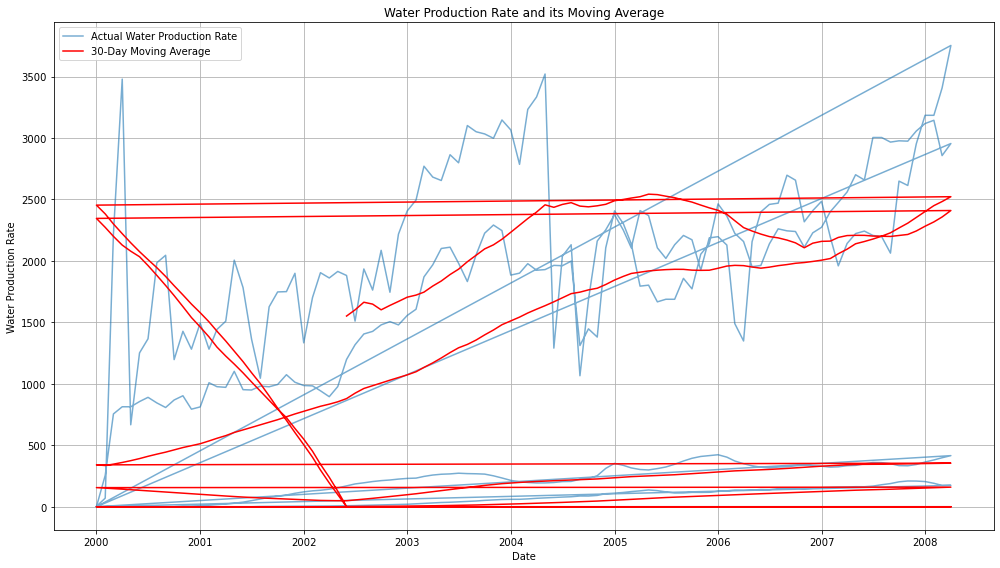

In [16]:
# Calculating the moving average for Water Production Rate
df['Water Production MA'] = df['Water Production Rate'].rolling(window=30).mean()

# Plotting the Water Production Rate and its moving average
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Water Production Rate'], label='Actual Water Production Rate', alpha=0.6)
plt.plot(df['Date'], df['Water Production MA'], label='30-Day Moving Average', color='red')
plt.title('Water Production Rate and its Moving Average')
plt.xlabel('Date')
plt.ylabel('Water Production Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Below is an interactive dropdown for selecting different wells and viewing their "Water Production Rate" along with its "30-Day Moving Average"

In [17]:
# Calculating the moving average for Water Production Rate
df['Water Production MA'] = df['Water Production Rate'].rolling(window=30).mean()

# Create an empty figure for Water Production Rate
fig_prod = go.Figure()

# Add an interactive dropdown menu for Water Production Rate
buttons_prod = []
for well in wells:
    well_df = df[df['Well Name'] == well]
    years = well_df['Date'].dt.year.unique()
    visible = [well == w for w in wells]
    
    button = dict(label=well,
                  method='update',
                  args=[{'visible': visible},
                        {'title': f'Water Production Rate and its Moving Average for {well}',
                         'xaxis': {'tickvals': years, 'ticktext': years}}])
    buttons_prod.append(button)
    
    fig_prod.add_trace(go.Scatter(x=well_df['Date'], y=well_df['Water Production Rate'], mode='lines', name='Actual Water Production Rate'))
    fig_prod.add_trace(go.Scatter(x=well_df['Date'], y=well_df['Water Production MA'], mode='lines', name='30-Day Moving Average', line=dict(color='red')))

# Update the layout for Water Production Rate
fig_prod.update_layout(title=f'Water Production Rate and its Moving Average',
                       xaxis_title='Year', 
                       yaxis_title='Water Production Rate',
                       updatemenus=[dict(buttons=buttons_prod, direction='down', x=1.05, y=1.2, showactive=True)])

# Display the initial well data for Water Production Rate
fig_prod.update_traces(visible=False)
fig_prod.data[0].visible = True
fig_prod.data[1].visible = True

# Display the plot for Water Production Rate
fig_prod.show()


The plot illustrates the Water Production Rate (in blue) alongside its 30-Day Moving Average (in red):

* The moving average provides a clearer view of the overall trend by smoothing out short-term variations.
* There is an evident increase in water production during the initial period.
* Later on, the trend appears to stabilize, with only minor fluctuations observed.

<hr>

#### Step 3: Identifying Trends in Water Injection Rate
Lastly, I'll visualize the trend in water injection rates using a moving average.

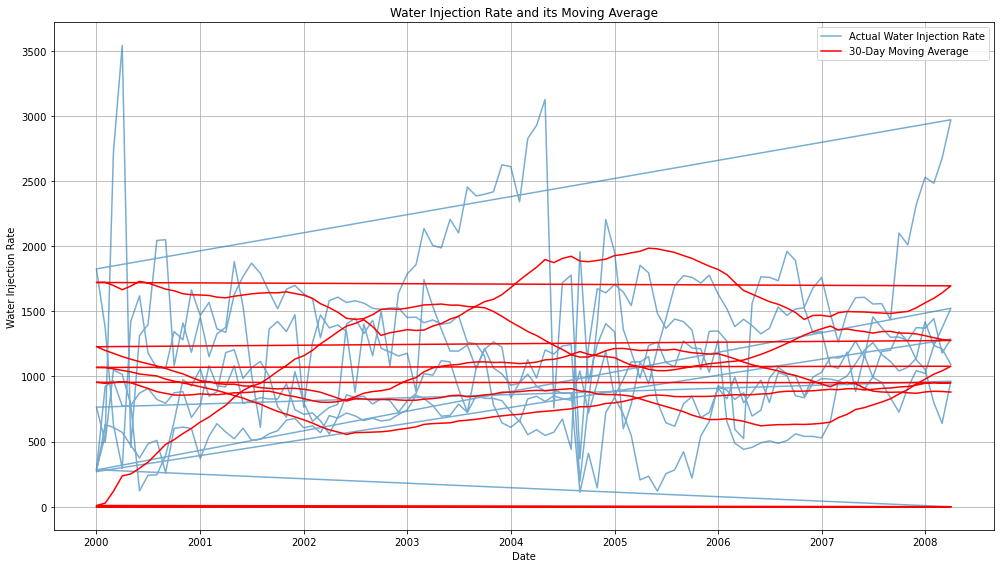

In [18]:
# Calculating the moving average for Water Injection Rate
df['Water Injection MA'] = df['Water Injection Rate'].rolling(window=30).mean()

# Plotting the Water Injection Rate and its moving average
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Water Injection Rate'], label='Actual Water Injection Rate', alpha=0.6)
plt.plot(df['Date'], df['Water Injection MA'], label='30-Day Moving Average', color='red')
plt.title('Water Injection Rate and its Moving Average')
plt.xlabel('Date')
plt.ylabel('Water Injection Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Below is an interactive dropdown for selecting different wells and viewing their "Water Injection Rate" along with its "30-Day Moving Average"

In [19]:
# Create the rolling mean column for Water Injection Rate
df['Water Injection MA'] = df['Water Injection Rate'].rolling(window=30).mean()

# Create an empty figure
fig = go.Figure()

# Add an interactive dropdown menu
buttons = []
for well in wells:
    well_df = df[df['Well Name'] == well]
    years = well_df['Date'].dt.year.unique()
    visible = [well == w for w in wells]
    
    button = dict(label=well,
                  method='update',
                  args=[{'visible': visible},
                        {'title': f'Water Injection Rate and its Moving Average for {well}',
                         'xaxis': {'tickvals': years, 'ticktext': years}}])
    buttons.append(button)
    
    fig.add_trace(go.Scatter(x=well_df['Date'], y=well_df['Water Injection Rate'], mode='lines', name='Actual Water Injection Rate'))
    fig.add_trace(go.Scatter(x=well_df['Date'], y=well_df['Water Injection MA'], mode='lines', name='30-Day Moving Average', line=dict(color='red')))

# Update the layout
fig.update_layout(title=f'Water Injection Rate and its Moving Average',
                  xaxis_title='Year', 
                  yaxis_title='Water Injection Rate',
                  updatemenus=[dict(buttons=buttons, direction='down', x=1.05, y=1.2, showactive=True)])

# Display the initial well data
fig.update_traces(visible=False)
fig.data[0].visible = True
fig.data[1].visible = True

# Display the plot
fig.show()


The plot showcases the Water Injection Rate (in blue) and its 30-Day Moving Average (in red):<br>

* The moving average provides a smoothed representation, highlighting longer-term trends.
* Initially, the water injection rate increases.
* As time progresses, the water injection rate seems to stabilize, albeit with some short-term fluctuations.

<hr>

### Summary:
* Oil Production Rate: A declining trend is observed initially, followed by stabilization.
* Water Production Rate: An initial increase is noticeable, which then stabilizes.
* Water Injection Rate: There's a rising trend at the beginning, which later stabilizes.
* Identifying these trends can be instrumental in making informed decisions for future operations, such as planning well interventions or optimizing production strategies.